## Libs

In [1]:
import matplotlib as matpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

# Using the Tensorflow backend (default).
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout
from tensorflow import set_random_seed
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from keras.callbacks import EarlyStopping

# advanced plotting
import seaborn as sns
plt.style.use('seaborn-darkgrid')
%matplotlib inline

Using TensorFlow backend.


## Data

In [2]:
%store -r data_MUB
data_MUB.head(2)

,Adj Close
Date,
2009-06-01,75.367775
2009-06-08,74.506866


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10cc73710>],
      dtype=object)

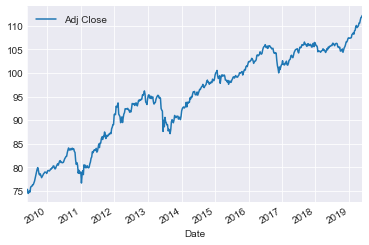

In [3]:
data_MUB.plot(subplots=True)

In [4]:
mm = MinMaxScaler(feature_range = (0,1))

In [5]:
dataset = mm.fit_transform(data_MUB)

In [6]:
#visualize a dataset[0:2]few data
dataset[0:2]

array([[0.02285297],
       [0.        ]])

1 data every week. 52 data per year, 522 data in total.
* use the past 2 months (8 weeks) to predict 1 week ahead.
* create window of last 8 obs to train model
Parameters:
* history_size - size of past window
* target_size - how far in future model should learn to predict

6 years of training data = 313 weeks. 
Rest of the 209 weeks are for validation.

In [7]:
split = 0.6

train_size = int(len(dataset) * split)
#validation
test_size = len(dataset) - train_size

train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

print("training, test set: " + str((len(train), len(test))))

training, test set: (313, 209)


In [8]:
def input_dataset(dataset, window):
    data_X, data_y = [], []
    for i in range(len(dataset) - window - 1):
        a = dataset[i:(i + window), 0]
        data_X.append(a)
        data_y.append(dataset[i + window, 0])
    return(np.array(data_X), np.array(data_y))


In [9]:
# New testing and training sets for rolling forecast.
window = 1
train_X, train_Y = input_dataset(train, window)
test_X, test_Y = input_dataset(test, window)
print("Original train shape:")
print(train_X.shape)

# Reshape input data to match Keras format.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New train shape:")
print(train_X.shape)

Original train shape:
(311, 1)
New train shape:
(311, 1, 1)


## Univar Forecasting Model
* Part 1 - model will be given the last 4 obs and needs to learn to predict price in the next time step.

In [10]:
def fit_LSTM(train_X, train_Y, window = 1, neurons=128):
    set_random_seed(3)
    model = Sequential()
    
    model.add(LSTM(neurons, 
                   input_shape = (1, window)
                  ))
    model.add(Dense(1))
    model.compile(loss = "mean_squared_error", 
                  optimizer = "adam")
    earlyStop=EarlyStopping(monitor="val_loss",verbose=2,patience=15)
    model.fit(train_X, 
              train_Y, 
              epochs = 2000, 
              batch_size = 25,
              shuffle = False
             # verbose = 2
             )
    
    return(model)

# Fit the first model.
model1 = fit_LSTM(train_X, train_Y, window)

W0917 00:17:49.774007 4524557760 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0917 00:17:49.775558 4524557760 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0917 00:17:49.777490 4524557760 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0917 00:17:49.997262 4524557760 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0917 00:17:50.142121 4524557760 deprecation.py:323] From //anaconda3/li

Epoch 1/2000
311/311 [==============================] - 2s 6ms/step - loss: 0.1287
Epoch 2/2000
311/311 [==============================] - 0s 277us/step - loss: 0.0797
Epoch 3/2000
311/311 [==============================] - 0s 276us/step - loss: 0.0446
Epoch 4/2000
311/311 [==============================] - 0s 327us/step - loss: 0.0235
Epoch 5/2000
311/311 [==============================] - 0s 305us/step - loss: 0.0151
Epoch 6/2000
311/311 [==============================] - 0s 285us/step - loss: 0.0142
Epoch 7/2000
311/311 [==============================] - 0s 368us/step - loss: 0.0148
Epoch 8/2000
311/311 [==============================] - 0s 331us/step - loss: 0.0146
Epoch 9/2000
311/311 [==============================] - 0s 357us/step - loss: 0.0139
Epoch 10/2000
311/311 [==============================] - 0s 330us/step - loss: 0.0130
Epoch 11/2000
311/311 [==============================] - 0s 315us/step - loss: 0.0121
Epoch 12/2000
311/311 [==============================] - 0s 389us

311/311 [==============================] - 0s 288us/step - loss: 3.3291e-04
Epoch 94/2000
311/311 [==============================] - 0s 283us/step - loss: 3.3287e-04
Epoch 95/2000
311/311 [==============================] - 0s 284us/step - loss: 3.3282e-04
Epoch 96/2000
311/311 [==============================] - 0s 286us/step - loss: 3.3277e-04
Epoch 97/2000
311/311 [==============================] - 0s 284us/step - loss: 3.3272e-04
Epoch 98/2000
311/311 [==============================] - 0s 285us/step - loss: 3.3268e-04
Epoch 99/2000
311/311 [==============================] - 0s 279us/step - loss: 3.3263e-04
Epoch 100/2000
311/311 [==============================] - 0s 282us/step - loss: 3.3258e-04
Epoch 101/2000
311/311 [==============================] - 0s 280us/step - loss: 3.3253e-04
Epoch 102/2000
311/311 [==============================] - 0s 281us/step - loss: 3.3248e-04
Epoch 103/2000
311/311 [==============================] - 0s 284us/step - loss: 3.3243e-04
Epoch 104/2000
311/3

311/311 [==============================] - 0s 310us/step - loss: 3.2755e-04
Epoch 184/2000
311/311 [==============================] - 0s 285us/step - loss: 3.2748e-04
Epoch 185/2000
311/311 [==============================] - 0s 292us/step - loss: 3.2741e-04
Epoch 186/2000
311/311 [==============================] - 0s 326us/step - loss: 3.2734e-04
Epoch 187/2000
311/311 [==============================] - 0s 318us/step - loss: 3.2727e-04
Epoch 188/2000
311/311 [==============================] - 0s 330us/step - loss: 3.2720e-04
Epoch 189/2000
311/311 [==============================] - 0s 333us/step - loss: 3.2714e-04
Epoch 190/2000
311/311 [==============================] - 0s 303us/step - loss: 3.2707e-04
Epoch 191/2000
311/311 [==============================] - 0s 285us/step - loss: 3.2700e-04
Epoch 192/2000
311/311 [==============================] - 0s 293us/step - loss: 3.2693e-04
Epoch 193/2000
311/311 [==============================] - 0s 303us/step - loss: 3.2686e-04
Epoch 194/2000

311/311 [==============================] - 0s 293us/step - loss: 3.2166e-04
Epoch 274/2000
311/311 [==============================] - 0s 287us/step - loss: 3.2160e-04
Epoch 275/2000
311/311 [==============================] - 0s 288us/step - loss: 3.2155e-04
Epoch 276/2000
311/311 [==============================] - 0s 288us/step - loss: 3.2150e-04
Epoch 277/2000
311/311 [==============================] - 0s 292us/step - loss: 3.2145e-04
Epoch 278/2000
311/311 [==============================] - 0s 290us/step - loss: 3.2140e-04
Epoch 279/2000
311/311 [==============================] - 0s 289us/step - loss: 3.2135e-04
Epoch 280/2000
311/311 [==============================] - 0s 288us/step - loss: 3.2130e-04
Epoch 281/2000
311/311 [==============================] - 0s 296us/step - loss: 3.2125e-04
Epoch 282/2000
311/311 [==============================] - 0s 301us/step - loss: 3.2120e-04
Epoch 283/2000
311/311 [==============================] - 0s 293us/step - loss: 3.2115e-04
Epoch 284/2000

311/311 [==============================] - 0s 301us/step - loss: 3.2048e-04
Epoch 364/2000
311/311 [==============================] - 0s 330us/step - loss: 3.2053e-04
Epoch 365/2000
311/311 [==============================] - 0s 302us/step - loss: 3.2058e-04
Epoch 366/2000
311/311 [==============================] - 0s 310us/step - loss: 3.2063e-04
Epoch 367/2000
311/311 [==============================] - 0s 312us/step - loss: 3.2068e-04
Epoch 368/2000
311/311 [==============================] - 0s 338us/step - loss: 3.2074e-04
Epoch 369/2000
311/311 [==============================] - 0s 341us/step - loss: 3.2079e-04
Epoch 370/2000
311/311 [==============================] - 0s 342us/step - loss: 3.2085e-04
Epoch 371/2000
311/311 [==============================] - 0s 323us/step - loss: 3.2091e-04
Epoch 372/2000
311/311 [==============================] - 0s 324us/step - loss: 3.2097e-04
Epoch 373/2000
311/311 [==============================] - 0s 327us/step - loss: 3.2103e-04
Epoch 374/2000

311/311 [==============================] - 0s 334us/step - loss: 3.2196e-04
Epoch 454/2000
311/311 [==============================] - 0s 344us/step - loss: 3.2198e-04
Epoch 455/2000
311/311 [==============================] - 0s 343us/step - loss: 3.2212e-04
Epoch 456/2000
311/311 [==============================] - 0s 335us/step - loss: 3.2244e-04
Epoch 457/2000
311/311 [==============================] - 0s 349us/step - loss: 3.2305e-04
Epoch 458/2000
311/311 [==============================] - 0s 338us/step - loss: 3.2414e-04
Epoch 459/2000
311/311 [==============================] - 0s 341us/step - loss: 3.2597e-04
Epoch 460/2000
311/311 [==============================] - 0s 342us/step - loss: 3.2899e-04
Epoch 461/2000
311/311 [==============================] - 0s 333us/step - loss: 3.3388e-04
Epoch 462/2000
311/311 [==============================] - 0s 337us/step - loss: 3.4161e-04
Epoch 463/2000
311/311 [==============================] - 0s 336us/step - loss: 3.5353e-04
Epoch 464/2000

311/311 [==============================] - 0s 359us/step - loss: 3.2574e-04
Epoch 544/2000
311/311 [==============================] - 0s 354us/step - loss: 3.2579e-04
Epoch 545/2000
311/311 [==============================] - 0s 349us/step - loss: 3.2584e-04
Epoch 546/2000
311/311 [==============================] - 0s 351us/step - loss: 3.2589e-04
Epoch 547/2000
311/311 [==============================] - 0s 350us/step - loss: 3.2593e-04
Epoch 548/2000
311/311 [==============================] - 0s 353us/step - loss: 3.2598e-04
Epoch 549/2000
311/311 [==============================] - 0s 347us/step - loss: 3.2602e-04
Epoch 550/2000
311/311 [==============================] - 0s 352us/step - loss: 3.2606e-04
Epoch 551/2000
311/311 [==============================] - 0s 359us/step - loss: 3.2610e-04
Epoch 552/2000
311/311 [==============================] - 0s 350us/step - loss: 3.2613e-04
Epoch 553/2000
311/311 [==============================] - 0s 350us/step - loss: 3.2615e-04
Epoch 554/2000

311/311 [==============================] - 0s 350us/step - loss: 3.2490e-04
Epoch 634/2000
311/311 [==============================] - 0s 356us/step - loss: 3.2494e-04
Epoch 635/2000
311/311 [==============================] - 0s 353us/step - loss: 3.2499e-04
Epoch 636/2000
311/311 [==============================] - 0s 354us/step - loss: 3.2503e-04
Epoch 637/2000
311/311 [==============================] - 0s 358us/step - loss: 3.2509e-04
Epoch 638/2000
311/311 [==============================] - 0s 359us/step - loss: 3.2515e-04
Epoch 639/2000
311/311 [==============================] - 0s 353us/step - loss: 3.2521e-04
Epoch 640/2000
311/311 [==============================] - 0s 366us/step - loss: 3.2528e-04
Epoch 641/2000
311/311 [==============================] - 0s 351us/step - loss: 3.2535e-04
Epoch 642/2000
311/311 [==============================] - 0s 350us/step - loss: 3.2542e-04
Epoch 643/2000
311/311 [==============================] - 0s 361us/step - loss: 3.2550e-04
Epoch 644/2000

311/311 [==============================] - 0s 359us/step - loss: 3.2461e-04
Epoch 724/2000
311/311 [==============================] - 0s 427us/step - loss: 3.2462e-04
Epoch 725/2000
311/311 [==============================] - 0s 414us/step - loss: 3.2464e-04
Epoch 726/2000
311/311 [==============================] - 0s 372us/step - loss: 3.2466e-04
Epoch 727/2000
311/311 [==============================] - 0s 366us/step - loss: 3.2468e-04
Epoch 728/2000
311/311 [==============================] - 0s 363us/step - loss: 3.2470e-04
Epoch 729/2000
311/311 [==============================] - 0s 361us/step - loss: 3.2473e-04
Epoch 730/2000
311/311 [==============================] - 0s 373us/step - loss: 3.2476e-04
Epoch 731/2000
311/311 [==============================] - 0s 372us/step - loss: 3.2479e-04
Epoch 732/2000
311/311 [==============================] - 0s 410us/step - loss: 3.2483e-04
Epoch 733/2000
311/311 [==============================] - 0s 387us/step - loss: 3.2486e-04
Epoch 734/2000

311/311 [==============================] - 0s 434us/step - loss: 3.2453e-04
Epoch 814/2000
311/311 [==============================] - 0s 416us/step - loss: 3.2453e-04
Epoch 815/2000
311/311 [==============================] - 0s 443us/step - loss: 3.2453e-04
Epoch 816/2000
311/311 [==============================] - 0s 415us/step - loss: 3.2452e-04
Epoch 817/2000
311/311 [==============================] - 0s 398us/step - loss: 3.2452e-04
Epoch 818/2000
311/311 [==============================] - 0s 448us/step - loss: 3.2453e-04
Epoch 819/2000
311/311 [==============================] - 0s 415us/step - loss: 3.2453e-04
Epoch 820/2000
311/311 [==============================] - 0s 431us/step - loss: 3.2453e-04
Epoch 821/2000
311/311 [==============================] - 0s 417us/step - loss: 3.2454e-04
Epoch 822/2000
311/311 [==============================] - 0s 431us/step - loss: 3.2454e-04
Epoch 823/2000
311/311 [==============================] - 0s 421us/step - loss: 3.2455e-04
Epoch 824/2000

311/311 [==============================] - 0s 387us/step - loss: 3.5091e-04
Epoch 904/2000
311/311 [==============================] - 0s 400us/step - loss: 3.4339e-04
Epoch 905/2000
311/311 [==============================] - 0s 386us/step - loss: 3.3700e-04
Epoch 906/2000
311/311 [==============================] - 0s 386us/step - loss: 3.3247e-04
Epoch 907/2000
311/311 [==============================] - 0s 386us/step - loss: 3.2963e-04
Epoch 908/2000
311/311 [==============================] - 0s 398us/step - loss: 3.2796e-04
Epoch 909/2000
311/311 [==============================] - 0s 377us/step - loss: 3.2698e-04
Epoch 910/2000
311/311 [==============================] - 0s 406us/step - loss: 3.2640e-04
Epoch 911/2000
311/311 [==============================] - 0s 394us/step - loss: 3.2603e-04
Epoch 912/2000
311/311 [==============================] - 0s 402us/step - loss: 3.2578e-04
Epoch 913/2000
311/311 [==============================] - 0s 397us/step - loss: 3.2559e-04
Epoch 914/2000

311/311 [==============================] - 0s 391us/step - loss: 3.2943e-04
Epoch 994/2000
311/311 [==============================] - 0s 398us/step - loss: 3.3557e-04
Epoch 995/2000
311/311 [==============================] - 0s 397us/step - loss: 3.4531e-04
Epoch 996/2000
311/311 [==============================] - 0s 382us/step - loss: 3.5988e-04
Epoch 997/2000
311/311 [==============================] - 0s 401us/step - loss: 3.7982e-04
Epoch 998/2000
311/311 [==============================] - 0s 420us/step - loss: 4.0315e-04
Epoch 999/2000
311/311 [==============================] - 0s 408us/step - loss: 4.2270e-04
Epoch 1000/2000
311/311 [==============================] - 0s 398us/step - loss: 4.2631e-04
Epoch 1001/2000
311/311 [==============================] - 0s 398us/step - loss: 4.0578e-04
Epoch 1002/2000
311/311 [==============================] - 0s 397us/step - loss: 3.6883e-04
Epoch 1003/2000
311/311 [==============================] - 0s 393us/step - loss: 3.3693e-04
Epoch 1004

311/311 [==============================] - 0s 370us/step - loss: 3.2474e-04
Epoch 1083/2000
311/311 [==============================] - 0s 366us/step - loss: 3.2476e-04
Epoch 1084/2000
311/311 [==============================] - 0s 373us/step - loss: 3.2478e-04
Epoch 1085/2000
311/311 [==============================] - 0s 376us/step - loss: 3.2481e-04
Epoch 1086/2000
311/311 [==============================] - 0s 362us/step - loss: 3.2484e-04
Epoch 1087/2000
311/311 [==============================] - 0s 378us/step - loss: 3.2487e-04
Epoch 1088/2000
311/311 [==============================] - 0s 365us/step - loss: 3.2490e-04
Epoch 1089/2000
311/311 [==============================] - 0s 361us/step - loss: 3.2494e-04
Epoch 1090/2000
311/311 [==============================] - 0s 374us/step - loss: 3.2498e-04
Epoch 1091/2000
311/311 [==============================] - 0s 375us/step - loss: 3.2502e-04
Epoch 1092/2000
311/311 [==============================] - 0s 361us/step - loss: 3.2507e-04
Epoc

311/311 [==============================] - 0s 357us/step - loss: 3.2399e-04
Epoch 1172/2000
311/311 [==============================] - 0s 359us/step - loss: 3.2411e-04
Epoch 1173/2000
311/311 [==============================] - 0s 352us/step - loss: 3.2422e-04
Epoch 1174/2000
311/311 [==============================] - 0s 366us/step - loss: 3.2433e-04
Epoch 1175/2000
311/311 [==============================] - 0s 374us/step - loss: 3.2442e-04
Epoch 1176/2000
311/311 [==============================] - 0s 374us/step - loss: 3.2451e-04
Epoch 1177/2000
311/311 [==============================] - 0s 370us/step - loss: 3.2458e-04
Epoch 1178/2000
311/311 [==============================] - 0s 370us/step - loss: 3.2464e-04
Epoch 1179/2000
311/311 [==============================] - 0s 359us/step - loss: 3.2468e-04
Epoch 1180/2000
311/311 [==============================] - 0s 364us/step - loss: 3.2471e-04
Epoch 1181/2000
311/311 [==============================] - 0s 378us/step - loss: 3.2473e-04
Epoc

311/311 [==============================] - 0s 375us/step - loss: 3.2401e-04
Epoch 1261/2000
311/311 [==============================] - 0s 371us/step - loss: 3.2443e-04
Epoch 1262/2000
311/311 [==============================] - 0s 367us/step - loss: 3.2484e-04
Epoch 1263/2000
311/311 [==============================] - 0s 378us/step - loss: 3.2524e-04
Epoch 1264/2000
311/311 [==============================] - 0s 363us/step - loss: 3.2560e-04
Epoch 1265/2000
311/311 [==============================] - 0s 372us/step - loss: 3.2592e-04
Epoch 1266/2000
311/311 [==============================] - 0s 383us/step - loss: 3.2620e-04
Epoch 1267/2000
311/311 [==============================] - 0s 398us/step - loss: 3.2640e-04
Epoch 1268/2000
311/311 [==============================] - 0s 375us/step - loss: 3.2654e-04
Epoch 1269/2000
311/311 [==============================] - 0s 372us/step - loss: 3.2659e-04
Epoch 1270/2000
311/311 [==============================] - 0s 374us/step - loss: 3.2657e-04
Epoc

311/311 [==============================] - 0s 363us/step - loss: 3.2287e-04
Epoch 1350/2000
311/311 [==============================] - 0s 365us/step - loss: 3.2328e-04
Epoch 1351/2000
311/311 [==============================] - 0s 366us/step - loss: 3.2372e-04
Epoch 1352/2000
311/311 [==============================] - 0s 362us/step - loss: 3.2419e-04
Epoch 1353/2000
311/311 [==============================] - 0s 361us/step - loss: 3.2468e-04
Epoch 1354/2000
311/311 [==============================] - 0s 365us/step - loss: 3.2517e-04
Epoch 1355/2000
311/311 [==============================] - 0s 356us/step - loss: 3.2566e-04
Epoch 1356/2000
311/311 [==============================] - 0s 372us/step - loss: 3.2612e-04
Epoch 1357/2000
311/311 [==============================] - 0s 362us/step - loss: 3.2654e-04
Epoch 1358/2000
311/311 [==============================] - 0s 359us/step - loss: 3.2689e-04
Epoch 1359/2000
311/311 [==============================] - 0s 370us/step - loss: 3.2717e-04
Epoc

311/311 [==============================] - 0s 382us/step - loss: 3.2212e-04
Epoch 1439/2000
311/311 [==============================] - 0s 367us/step - loss: 3.2236e-04
Epoch 1440/2000
311/311 [==============================] - 0s 366us/step - loss: 3.2261e-04
Epoch 1441/2000
311/311 [==============================] - 0s 379us/step - loss: 3.2288e-04
Epoch 1442/2000
311/311 [==============================] - 0s 381us/step - loss: 3.2317e-04
Epoch 1443/2000
311/311 [==============================] - 0s 382us/step - loss: 3.2346e-04
Epoch 1444/2000
311/311 [==============================] - 0s 386us/step - loss: 3.2376e-04
Epoch 1445/2000
311/311 [==============================] - 0s 385us/step - loss: 3.2406e-04
Epoch 1446/2000
311/311 [==============================] - 0s 400us/step - loss: 3.2435e-04
Epoch 1447/2000
311/311 [==============================] - 0s 382us/step - loss: 3.2464e-04
Epoch 1448/2000
311/311 [==============================] - 0s 378us/step - loss: 3.2490e-04
Epoc

311/311 [==============================] - 0s 361us/step - loss: 3.2211e-04
Epoch 1528/2000
311/311 [==============================] - 0s 361us/step - loss: 3.2251e-04
Epoch 1529/2000
311/311 [==============================] - 0s 362us/step - loss: 3.2297e-04
Epoch 1530/2000
311/311 [==============================] - 0s 363us/step - loss: 3.2348e-04
Epoch 1531/2000
311/311 [==============================] - 0s 363us/step - loss: 3.2403e-04
Epoch 1532/2000
311/311 [==============================] - 0s 361us/step - loss: 3.2461e-04
Epoch 1533/2000
311/311 [==============================] - 0s 374us/step - loss: 3.2521e-04
Epoch 1534/2000
311/311 [==============================] - 0s 377us/step - loss: 3.2581e-04
Epoch 1535/2000
311/311 [==============================] - 0s 363us/step - loss: 3.2638e-04
Epoch 1536/2000
311/311 [==============================] - 0s 357us/step - loss: 3.2689e-04
Epoch 1537/2000
311/311 [==============================] - 0s 369us/step - loss: 3.2733e-04
Epoc

311/311 [==============================] - 0s 392us/step - loss: 3.2296e-04
Epoch 1617/2000
311/311 [==============================] - 0s 402us/step - loss: 3.2330e-04
Epoch 1618/2000
311/311 [==============================] - 0s 397us/step - loss: 3.2366e-04
Epoch 1619/2000
311/311 [==============================] - 0s 394us/step - loss: 3.2403e-04
Epoch 1620/2000
311/311 [==============================] - 0s 392us/step - loss: 3.2440e-04
Epoch 1621/2000
311/311 [==============================] - 0s 391us/step - loss: 3.2475e-04
Epoch 1622/2000
311/311 [==============================] - 0s 373us/step - loss: 3.2508e-04
Epoch 1623/2000
311/311 [==============================] - 0s 399us/step - loss: 3.2539e-04
Epoch 1624/2000
311/311 [==============================] - 0s 389us/step - loss: 3.2565e-04
Epoch 1625/2000
311/311 [==============================] - 0s 373us/step - loss: 3.2585e-04
Epoch 1626/2000
311/311 [==============================] - 0s 396us/step - loss: 3.2600e-04
Epoc

311/311 [==============================] - 0s 375us/step - loss: 3.2544e-04
Epoch 1706/2000
311/311 [==============================] - 0s 364us/step - loss: 3.2596e-04
Epoch 1707/2000
311/311 [==============================] - 0s 359us/step - loss: 3.2643e-04
Epoch 1708/2000
311/311 [==============================] - 0s 352us/step - loss: 3.2682e-04
Epoch 1709/2000
311/311 [==============================] - 0s 364us/step - loss: 3.2712e-04
Epoch 1710/2000
311/311 [==============================] - 0s 360us/step - loss: 3.2730e-04
Epoch 1711/2000
311/311 [==============================] - 0s 360us/step - loss: 3.2735e-04
Epoch 1712/2000
311/311 [==============================] - 0s 355us/step - loss: 3.2726e-04
Epoch 1713/2000
311/311 [==============================] - 0s 366us/step - loss: 3.2703e-04
Epoch 1714/2000
311/311 [==============================] - 0s 365us/step - loss: 3.2668e-04
Epoch 1715/2000
311/311 [==============================] - 0s 364us/step - loss: 3.2622e-04
Epoc

311/311 [==============================] - 0s 388us/step - loss: 3.2675e-04
Epoch 1795/2000
311/311 [==============================] - 0s 386us/step - loss: 3.2643e-04
Epoch 1796/2000
311/311 [==============================] - 0s 378us/step - loss: 3.2600e-04
Epoch 1797/2000
311/311 [==============================] - 0s 389us/step - loss: 3.2551e-04
Epoch 1798/2000
311/311 [==============================] - 0s 386us/step - loss: 3.2497e-04
Epoch 1799/2000
311/311 [==============================] - 0s 383us/step - loss: 3.2442e-04
Epoch 1800/2000
311/311 [==============================] - 0s 382us/step - loss: 3.2387e-04
Epoch 1801/2000
311/311 [==============================] - 0s 409us/step - loss: 3.2334e-04
Epoch 1802/2000
311/311 [==============================] - 0s 386us/step - loss: 3.2287e-04
Epoch 1803/2000
311/311 [==============================] - 0s 379us/step - loss: 3.2245e-04
Epoch 1804/2000
311/311 [==============================] - 0s 372us/step - loss: 3.2211e-04
Epoc

311/311 [==============================] - 0s 409us/step - loss: 3.2340e-04
Epoch 1884/2000
311/311 [==============================] - 0s 485us/step - loss: 3.2295e-04
Epoch 1885/2000
311/311 [==============================] - 0s 436us/step - loss: 3.2255e-04
Epoch 1886/2000
311/311 [==============================] - 0s 401us/step - loss: 3.2221e-04
Epoch 1887/2000
311/311 [==============================] - 0s 456us/step - loss: 3.2194e-04
Epoch 1888/2000
311/311 [==============================] - 0s 472us/step - loss: 3.2173e-04
Epoch 1889/2000
311/311 [==============================] - 0s 428us/step - loss: 3.2157e-04
Epoch 1890/2000
311/311 [==============================] - 0s 442us/step - loss: 3.2148e-04
Epoch 1891/2000
311/311 [==============================] - 0s 411us/step - loss: 3.2142e-04
Epoch 1892/2000
311/311 [==============================] - 0s 493us/step - loss: 3.2141e-04
Epoch 1893/2000
311/311 [==============================] - 0s 554us/step - loss: 3.2142e-04
Epoc

311/311 [==============================] - 0s 398us/step - loss: 3.2143e-04
Epoch 1972/2000
311/311 [==============================] - 0s 398us/step - loss: 3.2146e-04
Epoch 1973/2000
311/311 [==============================] - 0s 393us/step - loss: 3.2147e-04
Epoch 1974/2000
311/311 [==============================] - 0s 390us/step - loss: 3.2148e-04
Epoch 1975/2000
311/311 [==============================] - 0s 392us/step - loss: 3.2148e-04
Epoch 1976/2000
311/311 [==============================] - 0s 383us/step - loss: 3.2150e-04
Epoch 1977/2000
311/311 [==============================] - 0s 386us/step - loss: 3.2157e-04
Epoch 1978/2000
311/311 [==============================] - 0s 372us/step - loss: 3.2176e-04
Epoch 1979/2000
311/311 [==============================] - 0s 368us/step - loss: 3.2215e-04
Epoch 1980/2000
311/311 [==============================] - 0s 425us/step - loss: 3.2288e-04
Epoch 1981/2000
311/311 [==============================] - 0s 404us/step - loss: 3.2413e-04
Epoc

## Results 
### Predictions and model evaluations
The advantage of using the RMSE is that it's in the same unit as the original data, i.e. price/wk (1.000 passengers / month in Kaggle example).

In [11]:
def prediction_score(model, X, Y):
    # Make predictions using input data
    pred = mm.inverse_transform(model.predict(X))
    # Show Y on original scale
    original_data = mm.inverse_transform([Y])
    # RMSE.
    score = math.sqrt(mean_squared_error(original_data[0], pred[:, 0]))
    return(score, pred)

rmse_train, train_pred = prediction_score(model1, train_X, train_Y)
rmse_test, test_pred = prediction_score(model1, test_X, test_Y)

print("Training score: %.2f RMSE" % rmse_train)
print("Testing score: %.2f RMSE" % rmse_test)

Training score: 0.68 RMSE
Testing score: 0.40 RMSE


### Plotting and comparing original data, predictions, forecasts

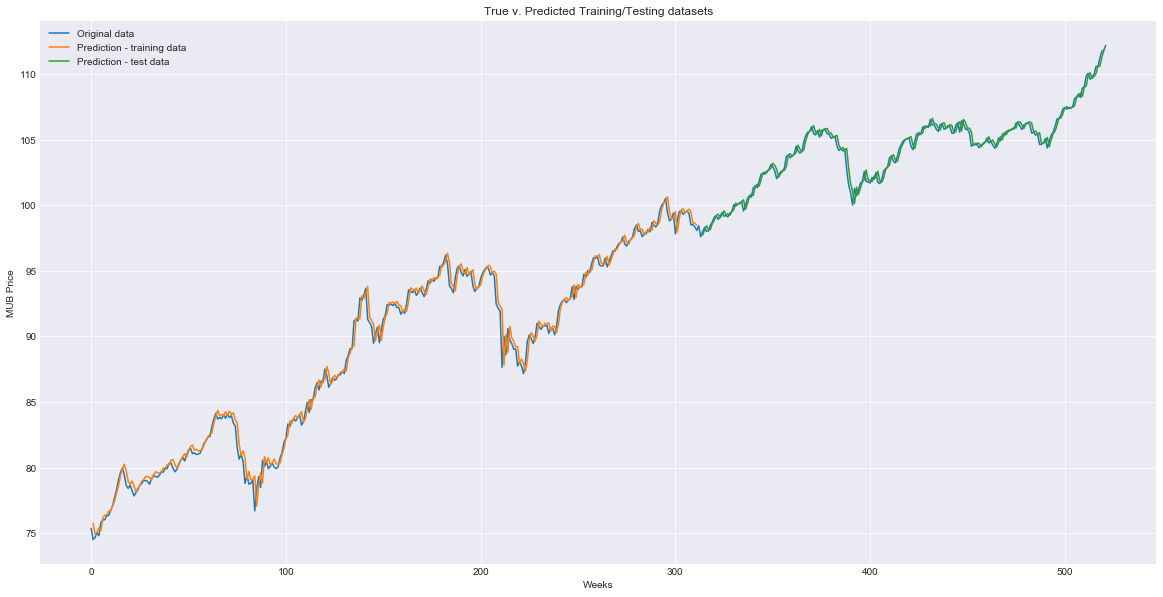

In [12]:
# Train predictions
train_pred_plot = np.empty_like(dataset)
train_pred_plot[:, :] = np.nan
train_pred_plot[window:len(train_pred) + window, :] = train_pred

# Test predictions
test_pred_plot = np.empty_like(dataset)
test_pred_plot[:, :] = np.nan
test_pred_plot[len(train_pred) + (window * 2) + 1:len(dataset) - 1, :] = test_pred

#plot
plt.figure(figsize = (20, 10))
plt.plot(mm.inverse_transform(dataset), label = 'Original data')
plt.plot(train_pred_plot, label = 'Prediction - training data')
plt.plot(test_pred_plot, label = 'Prediction - test data')
plt.xlabel('Weeks')
plt.ylabel('MUB Price')
plt.title('True v. Predicted Training/Testing datasets')
plt.legend()
plt.show()

In [13]:
LSTM_pred_MUB = pd.DataFrame(test_pred)
%store LSTM_pred_MUB

Stored 'LSTM_pred_MUB' (DataFrame)
